# Projet 3 : Régression en grande dimension et sparsité

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Les dimensions du probleme
n = 1000
p = 5000
# initialiser le vecteur beta
beta = np.zeros((p,1))
beta[0:15] = np.ones((15,1))
# initialiser le vecteur eta
eta = np.random.normal(size = (n,1))

# initialiser le vecteur X
X = np.random.multivariate_normal( np.zeros(n), np.eye(n),size = p).T

# Calculer le vecteur Y
Y = np.dot(X,beta) + eta

In [3]:
# Separation des donnees en utilisant sickit learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33)

In [4]:
# importation de la librairie ElasticNet
from sklearn.linear_model import ElasticNet

In [5]:
alpha = 1
etapes = np.linspace(0,1,11)
vecteurBeta = np.zeros((p,11))
indice = 0
for l1_ratio in etapes :
    regr = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=5000)
    regr.fit(X, Y)
    vecteurBeta[:,indice] = regr.coef_
    indice = indice + 1

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


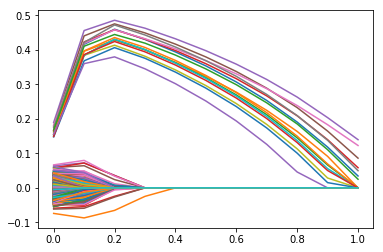

In [6]:
for i in range(p):
    plt.plot(etapes,vecteurBeta[i,:])

## Question 1:b le chemin de régularisation de Lasso

In [52]:
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0,1.3,1.5])
l1_ratio = 1
vecteurBetaLasso = np.zeros((p,len(my_alphas)))
indice = 0
for alpha in my_alphas : 
    regr = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=5000)
    regr.fit(X, Y)
    vecteurBetaLasso[:,indice] = regr.coef_
    indice = indice + 1

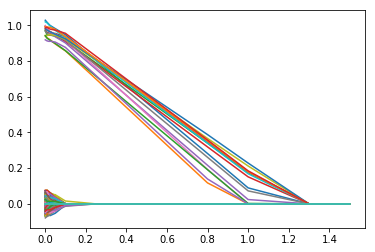

In [53]:
for i in range(p):
    plt.plot(my_alphas,vecteurBetaLasso[i,:])

# Valeur optimale pour le lasso

In [7]:
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0,1.3])
l1_ratio = 1
LassoRegu = np.zeros((p,len(my_alphas)))
vecteurPredi = np.zeros((330,len(my_alphas)))
erreurLasso = np.zeros(len(my_alphas))
indice = 0
for alpha in my_alphas : 
    regr = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=5000)
    regr.fit(X_train, y_train)
    LassoRegu[:,indice] = regr.coef_
    vecteurPredi[:,indice] = np.dot(X_test, regr.coef_)
    erreurLasso[indice] = np.linalg.norm(y_test - vecteurPredi[:,indice])
    indice = indice + 1
indi = np.argmin(erreurLasso)
meilleurAlpha = my_alphas[indi]
print(meilleurAlpha)
print(erreurLasso[indi])

1.3
1372.610859797488


on trouve la meilleure valeur de alpha = 0.3

# Valeur optimale pour le ridge

In [8]:
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0,1.3])
l1_ratio = 0
RidgeRegu = np.zeros((p,len(my_alphas)))
vecteurPredi = np.zeros((330,len(my_alphas)))
erreurRidge = np.zeros(len(my_alphas))
indice = 0
for alpha in my_alphas : 
    regr = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=1000)
    regr.fit(X_train, y_train)
    RidgeRegu[:,indice] = regr.coef_
    vecteurPredi[:,indice] = np.dot(X_test, regr.coef_)
    erreurRidge[indice] = np.linalg.norm(y_test - vecteurPredi[:,indice])
    indice = indice + 1
indi = np.argmin(erreurRidge)
meilleurAlpha = my_alphas[indi]
print(meilleurAlpha)
print(erreurRidge[indi])

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

1.3
1428.564791549755


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


On trouve la meilleure valeur de alpha égale à 1.3

# Valeur optimale Elastic net

In [10]:
my_alphas = np.array([0.001,0.005,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0,1.3])
my_l1_ratios  = np.linspace(0,1,11)
grille = np.zeros((len(my_alphas),len(my_l1_ratios)))
for i_alpha in range(len(my_alphas)):
    for i_ratio in range(len(my_l1_ratios)) :
        regr = ElasticNet(alpha=my_alphas[i_alpha],l1_ratio=my_l1_ratios[i_ratio],max_iter=1000)
        regr.fit(X_train, y_train)
        vecteurPredi = np.dot(X_test, regr.coef_)
        grille[i_alpha,i_ratio] = np.linalg.norm(y_test - vecteurPredi)

        

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

In [11]:
grille.argmin()

131

In [12]:
mesIndices=np.unravel_index(grille.argmin(),grille.shape)

In [13]:

my_alphas[mesIndices[0]]


1.3

In [14]:
my_l1_ratios[mesIndices[1]]

1.0

## Question 1.d
C'est l'estimateur Lasso (et elastic net) qui donne la meilleure prediction sur l'échantillon test